In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as colors

from netCDF4 import Dataset

In [2]:
# Load in the reference (unfiltered) velocities
with Dataset( '../velocity_sample.nc', 'r' ) as dset:
    lon = dset['longitude'][:]
    lat = dset['latitude' ][:]

    u_lon_full = dset['uo'][0,0,:,:]
    u_lat_full = dset['vo'][0,0,:,:]

In [3]:
filter_files = [ 'filter_100km.nc', 'filter_500km.nc', 'filter_2000km.nc',  'filter_5000km.nc' ]

In [4]:
plot_params = dict( cmap = 'plasma', norm = colors.LogNorm( vmin = 1e-3, vmax = 1 ), rasterized = True )

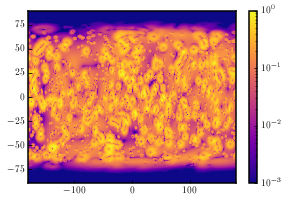

In [5]:
# Plot the original unfiltered velocity, for reference
fig, axes = plt.subplots( 1, 1, sharex = True, sharey = True, figsize = (4,3), gridspec_kw = dict( left = 0.1, right = 1, bottom = 0.1, top = 0.9 ) )

qm = axes.pcolormesh( lon, lat, np.sqrt( u_lon_full**2 + u_lat_full**2 ), **plot_params )
plt.colorbar(qm, ax = axes)

/opt/local/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in sqrt


Text(0, 0.5, 'Root Fine KE')

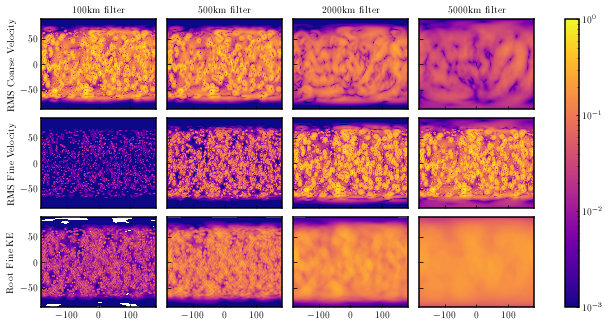

In [6]:
# Plot the filtered fields
fig, axes = plt.subplots( 3, 4, sharex = True, sharey = True, figsize = (9,5), gridspec_kw = dict( left = 0.05, right = 1, bottom = 0.1, top = 0.9, wspace = 0.1, hspace = 0.1 ) )

qms = np.zeros( axes.shape, dtype = 'object' )

for Icol, filename in enumerate( filter_files ):

    with Dataset( filename, 'r' ) as dset:

        u_lon_coarse = dset['u_lon_tor'][0,0,:,:] + dset['u_lon_pot'][0,0,:,:]
        u_lat_coarse = dset['u_lat_tor'][0,0,:,:] + dset['u_lat_pot'][0,0,:,:]

        u_lon_fine = u_lon_full - u_lon_coarse
        u_lat_fine = u_lat_full - u_lat_coarse

        RMS_coarse = np.sqrt( u_lon_coarse**2 + u_lat_coarse**2 )
        RMS_fine   = np.sqrt( u_lon_fine**2 + u_lat_fine**2 )
        root_KE_fine   = np.sqrt( 2 * dset['KE_tor_fine'][0,0,:,:] / 1025. )

        # Do the plotting
        qms[0,Icol] = axes[0,Icol].pcolormesh( lon, lat, RMS_coarse,   **plot_params )
        qms[1,Icol] = axes[1,Icol].pcolormesh( lon, lat, RMS_fine,     **plot_params )
        qms[2,Icol] = axes[2,Icol].pcolormesh( lon, lat, root_KE_fine, **plot_params )

        # Add title showing filter scale
        axes[0,Icol].set_title('{0:g}km filter'.format( dset.filter_scale / 1e3 ))

# Add a colour bar
plt.colorbar( qms[0,0], ax = axes )

# Add row labels
axes[0,0].set_ylabel('RMS Coarse Velocity')
axes[1,0].set_ylabel('RMS Fine Velocity')
axes[2,0].set_ylabel('Root Fine KE')